## Long Article Text Content Summarization and keyword extraction using NLP :
- Find out what words were most mentioned in the targetted article using NLP?
- And also try to figure out what this article is about?
- Then summarize the article content?

## Why to do text summarization:
- Text summarization is an NLP technique that extracts text from a large amount of data. It helps in creating a shorter version of the large text available.
- Reduces reading time, helps in better research work, increases the amount of information that can fit in an area

## Technical aspects:
- Obtain Data
- Text Preprocessing
- Convert paragraphs to sentences
- Tokenizing the sentences
- Find weighted frequency of occurrence
- Replace words by weighted frequency in sentences
- Sort sentences in descending order of weights
- Summarizing the Article

## Packages used: BeautifulSoup, nltk, gensim, wordcloud

In [2]:
#import necessary packages for web scrapping:
import bs4 
import requests
from selenium import webdriver
import time
import pandas as pd
url = 'https://en.wikipedia.org/wiki/Machine_learning'

In [3]:
import requests
res = requests.get(url)

In [4]:
soup = bs4.BeautifulSoup(res.text, 'html.parser') #there are many types of parser

In [5]:
#Get only the entire article content:
article = []
for word in soup.find_all('p'):
    article.append(word.text.strip())
article

['Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.',
 'A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers; but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervi

#### Now Apply NLP techniques to conclude about this article: The article is about what topic/person/things etc?

##### Data Pre-processing:
###### 1. Tokenization: used the function word_tokenizer() to split sentences into words

In [6]:
sen = ''
for i in article:
    sen = sen+i
sen

'Machine learning (ML) is the study of computer algorithms that improve automatically through experience and by the use of data.[1] It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers; but not all machine learning is statistical learning. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a related field of study, focusing on exploratory data analysis through unsupervised le

In [7]:
import nltk
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import text_to_word_sequence
tokens = text_to_word_sequence(sen)

In [8]:
tokens[:20]

['machine',
 'learning',
 'ml',
 'is',
 'the',
 'study',
 'of',
 'computer',
 'algorithms',
 'that',
 'improve',
 'automatically',
 'through',
 'experience',
 'and',
 'by',
 'the',
 'use',
 'of',
 'data']

In [9]:
#convert the above list into a string for further pre-processing steps:
text = ' '
text = text.join(tokens)
print(text[:40])
print(len(text))

machine learning ml is the study of comp
44763


###### 2. Punctuations and Stop words removal:

In [10]:
# Import the stop word list
from nltk.corpus import stopwords
nltk.download('stopwords')

#print the 10 stop words:
print(stopwords.words("english")[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91842\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import nltk
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
punct =string.punctuation

clean_data =[]
for word in nltk.word_tokenize(text):
    if word not in punct:
        if word not in stop_words:
            clean_data.append(word)
            
clean_data[:20]

['machine',
 'learning',
 'ml',
 'study',
 'computer',
 'algorithms',
 'improve',
 'automatically',
 'experience',
 'use',
 'data',
 '1',
 'seen',
 'part',
 'artificial',
 'intelligence',
 'machine',
 'learning',
 'algorithms',
 'build']

In [40]:
len(clean_data)

4378

- Note that after removing the punctuations and stop words the length of the string is now reduced to 4378 from 44763

### Once the text data is cleaned, we can apply various techniques to find the keywords from the data and summarize it:
- Option1: I have applied first visual technique to get a quick idea about the key words present in this article
- Option2: Calculate weighted frequency of occurrence for each word and then sort in ascending order to get the highest occured words

###### Generated word cloud, to obtain an intuitive visualization of the most used words in the article according to their sizes:

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

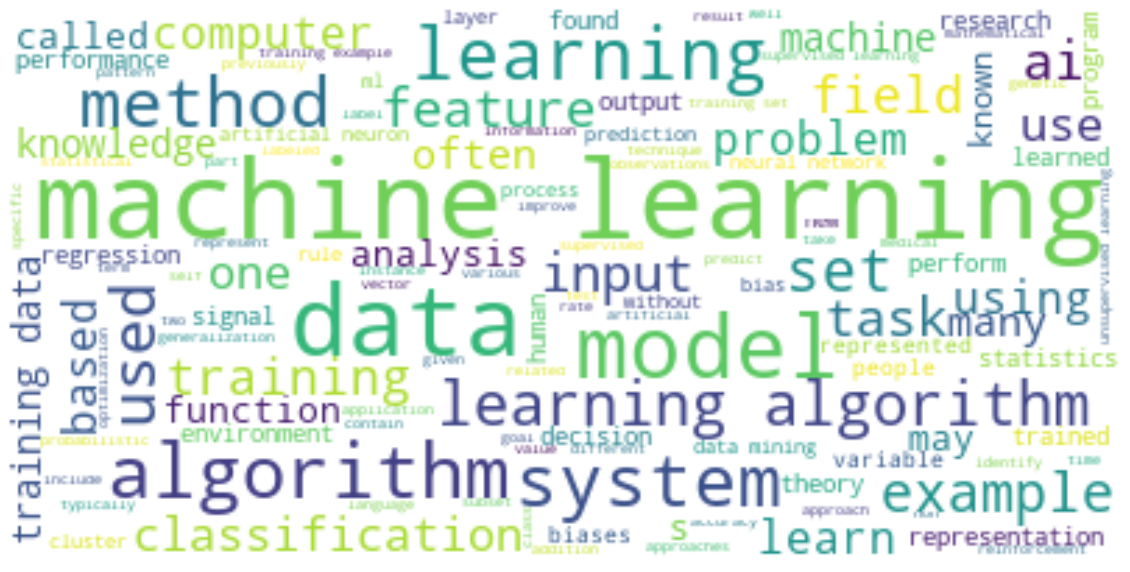

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
wc = WordCloud(max_font_size=50, max_words=500, background_color='white')
wordcloud_jan = wc.generate_from_text(' '.join(clean_data))
plt.imshow(wordcloud_jan, interpolation='bilinear')
plt.axis('off')
plt.show()

- That way, we can quickly see which words have appeared mostly in this article such as - machine learning, data, model, algorithm, AI etc

#### Finding weighted frequencies of occurrence:

In [14]:
import re

#Create a frequency table of words, a python dictionary that will keep a record of how many times each word appears in the text:

stopwords = nltk.corpus.stopwords.words('english')
word_frequencies = {}
for word in nltk.word_tokenize(text):
    if word not in stopwords:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1
            
maximum_frequncy = max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

#store the weighted frequencies in a dataframe and sort the values  
df = pd.Series(data=word_frequencies)
df.sort_values(ascending=False)[:20]

learning          1.000000
machine           0.553672
data              0.502825
training          0.271186
algorithms        0.248588
model             0.192090
set               0.175141
used              0.163842
algorithm         0.124294
ai                0.124294
artificial        0.124294
based             0.112994
systems           0.107345
methods           0.107345
classification    0.101695
example           0.101695
also              0.101695
one               0.096045
supervised        0.096045
field             0.090395
dtype: float64

- All the weights are also normalized between 0 to 1

###### Use the gensim summarizer method to summarize the text. And using keywords method extracted the top 20 keywords from this text

In [1]:
#!pip install gensim==3.8.3
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [22]:
#Taking only 2% of the entire text to be shown as the summarized version
print(summarize(sen, ratio=0.02))

Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so.[2] Machine learning algorithms are used in a wide variety of applications, such as in medicine, email filtering, and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.A subset of machine learning is closely related to computational statistics, which focuses on making predictions using computers; but not all machine learning is statistical learning.
The training examples come from some generally unknown probability distribution (considered representative of the space of occurrences) and the learner has to build a general model about this space that enables it to produce sufficiently accurate predictions in new cases.The computational analysis of machine learning algorithms and their performance is a branch of theoretical computer science known as 

In [31]:
#Display the highest ranked words of the given text
print(keywords(sen, words=20, lemmatize=True))

learned
data
algorithmically
machines
modeling
trained
systems
method
examples
represents
features
task
predicted
setting
problem
include
based
input
generalizations
processes
